# DEMO: Accessing NASA JPL Digital Ephemeris through Python





In [112]:
# spiceypy is a python wrapper for NASA NAIF SPICE toolkit
# https://naif.jpl.nasa.gov/naif/toolkit.html
# https://spiceypy.readthedocs.io/en/master/
import spiceypy as sp

In [113]:
# List of SPICE kernels. DE4xx planetary ephemeris must come first.
# https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/
spkFiles=['de430.bsp']

In [114]:
# SPICE uses integer identifyiers for planets in DE4xx ephemeris files 
Ephemdict={'Sun':10, 'Mercury':1, 'Venus':2, 'Earth':399, 'Moon':301,
        'Mars':4, 'Jupiter':5,  'Saturn':6, 'Uranus':7, 'Neptune':8,
        'Pluto':9}

In [115]:
def loadSpiceKernels(spkfiles=spkFiles):
    """ Load NASA NAIF spice kernels such as 
    DE4xx planetary ephemeris into memory for later access. 
    If multiple spice kernels are loaded, planetary ephemeris must 
    be loaded first.
    
    Parameters:
    -----------
    spkfiles ... path to spice kernel files
    
    Raises:
    -------
    ValueError
    """
    for f in spkfiles:
        try:
            sp.furnsh(f)
        except:
            raise ValueError('Error in loadSpiceKernels: could not load spice file:', f)
    return

In [116]:
def getDEstate(target,t,frame='ECLIPJ2000'):
    """Read state vector of target from DExxx ephemeris.
    
    Parameters:
    -----------
    
    target: Integer
        Spice Kernel ID
        {'Sun':10, 'Mercury':1, 'Venus':2, 'Earth':399, 'Moon':301,
        'Mars':4, 'Jupiter':5,  'Saturn':6, 'Uranus':7, 'Neptune':8,
        'Pluto':9}
        
    t: float
        ephemeris time (ephemeris seconds beyond epoch J2000)
    
    frame: str
        'J2000': ICRF (=EME2000) , 'ECLIP2000': Ecliptic frame
    
    Returns:
    --------
    state vector (x,y,z,vx,vy,vz) in units of km and km/s
    """
    return sp.spkez(target,t,frame,'NONE',0)[0]

In [117]:
def mjd2et(MJD):
    """Converts modified Julian Date to JPL NAIF SPICE Ephemeris time.
    Only valid for TDB timescales.
    
    Parameters:
    -----------
    MJD ... modified Julian Day
    
    Returns:
    --------
    ET ... ephemeris time (ephemeris seconds beyond epoch J2000)

    """
    ET=(MJD+2400000.5-2451545.0)*86400
    return ET


### Step 1: Download DE4xx ephemeris files into your working folder
https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/

### Step 2: Load ephemeris files into memory

In [118]:
try:
    loadSpiceKernels(spkFiles)
except:
    raise ValueError('Error: Could not load SPICE Kernels. Please check file path.')

### Step 3: Define time for output in MJD as well as the target body and read the corresponding state vector from the Ephemeris file 

In [119]:
t=59600
au=149597870.7

In [120]:
Earth_pos=getDEstate(Ephemdict['Earth'], mjd2et(t),frame='J2000')[0:3]/au

In [121]:
print(Earth_pos)

[-0.50963722  0.77991865  0.3382822 ]


### Plot the orbit of the Earth 

In [122]:
tt=range(59600,60000)

In [123]:
Earth_pos_tt=[]
for t in tt:
    Earth_pos_tt.append(getDEstate(Ephemdict['Earth'], mjd2et(t),frame='J2000')[0:3]/au)

In [128]:
import numpy as np
pos=np.array(Earth_pos_tt)

[]

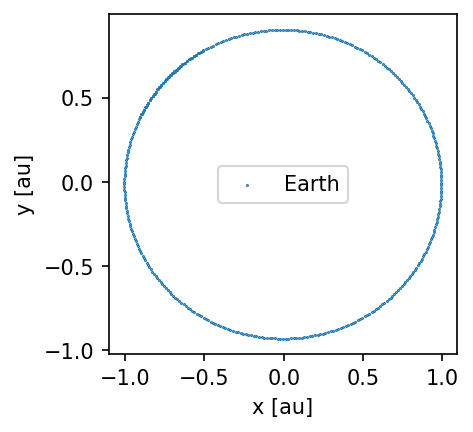

In [132]:
import matplotlib.pyplot as plt
plt.figure(dpi=150,figsize=(3,3))
plt.scatter(pos[:,0],pos[:,1], s=0.2, label='Earth')
plt.xlabel('x [au]')
plt.ylabel('y [au]')
plt.legend()
plt.plot()